In [1]:
# Radiance to Kelvin Conversion

import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import pathlib as ptlib

def radiance_to_kelvin(radiance, wavelength):
    """
    Convert radiance to temperature in Kelvin using Planck's function.
    
    Parameters:
    radiance (float or array): Radiance value(s) in W/m^2/sr/μm
    wavelength (float): Central wavelength in μm
    
    Returns:
    float or array: Temperature in Kelvin
    """
    c1 = 1.19104e8  # First radiation constant (W⋅μm^4/m^2/sr)
    c2 = 14387.7    # Second radiation constant (μm⋅K)
    
    # Added a small epsilon to avoid log(0) and divide by zero errors
    epsilon = 1e-10
    temperature = c2 / (wavelength * np.log((c1 / (np.maximum(radiance, epsilon) * wavelength**5)) + 1))
    return temperature

def __List_Rasters(Path, file_type="tif"):
    path = ptlib.Path(Path)
    All_Rasters = list(path.glob('**/*.{}'.format(file_type)))
    Raster_List = []
    
    for raster in All_Rasters:
        Raster_Path = str(raster).replace("/", "\\")
        
        # Check if the image can be opened and contains valid data
        try:
            with Image.open(Raster_Path) as img:
                img_data = np.array(img)
                if np.any(np.isfinite(img_data)):  # Check for valid numerical data
                    Raster_List.append(Raster_Path)
        except Exception as e:
            print(f"Error reading {Raster_Path}: {e}")
    
    return Raster_List

def process_image(image_path, wavelength):
    """
    Process an image to convert radiance values to temperature in Kelvin.
    
    Parameters:
    image_path (str): Path to the input image
    wavelength (float): Central wavelength in μm
    
    Returns:
    tuple: (numpy.ndarray, numpy.ndarray) 2D arrays of radiance and temperature values
    """
    # Open the image and convert to numpy array
    with Image.open(image_path) as img:
        radiance_image = np.array(img).astype(float)
    
    # Replace any non-finite values with NaN
    radiance_image[~np.isfinite(radiance_image)] = np.nan
    
    # Assuming the image values are directly proportional to radiance
    kelvin_image = radiance_to_kelvin(radiance_image, wavelength)
    
    return radiance_image, kelvin_image

# Example usage
wavelength = 10.9  # μm (example wavelength for thermal infrared)
folder_path = '/Users/haritshah/Downloads/wc2.1_2.5m_tmax_2010-01.tif'  # Replace with your folder path

# Get list of valid raster files
list_of_rasters = __List_Rasters(folder_path)

if len(list_of_rasters) == 0:
    print("There is not a raster in the folder pathway")
else:
    print(f"Folder pathway contains {len(list_of_rasters)} rasters")
    
    # Process the first valid raster file
    image_path = list_of_rasters[0]
    radiance_image, kelvin_image = process_image(image_path, wavelength)

    # Print radiance values
    print("Radiance values from the TIFF image:")
    print(radiance_image)

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.imshow(kelvin_image, cmap='inferno')
    plt.colorbar(label='Temperature (K)')
    plt.title(f'Radiance to Kelvin Conversion (λ = {wavelength} μm)')
    plt.xlabel('Pixel X')
    plt.ylabel('Pixel Y')
    plt.show()

    # Print some statistics for both radiance and temperature
    print("Image statistics:")
    print("Radiance values:")
    print(f"Min radiance: {np.nanmin(radiance_image):.2f} W/m^2/sr/μm")
    print(f"Max radiance: {np.nanmax(radiance_image):.2f} W/m^2/sr/μm")
    print(f"Mean radiance: {np.nanmean(radiance_image):.2f} W/m^2/sr/μm")
    print("\nConverted temperature values:")
    print(f"Min temperature: {np.nanmin(kelvin_image):.2f} K")
    print(f"Max temperature: {np.nanmax(kelvin_image):.2f} K")
    print(f"Mean temperature: {np.nanmean(kelvin_image):.2f} K")

    # Print some example conversions
    print("\nExample conversions:")
    sample_radiances = [np.nanmin(radiance_image), np.nanmean(radiance_image), np.nanmax(radiance_image)]
    for rad in sample_radiances:
        temp = radiance_to_kelvin(rad, wavelength)
        print(f"Radiance: {rad:.2f} W/m^2/sr/μm -> Temperature: {temp:.2f} K")


There is not a raster in the folder pathway


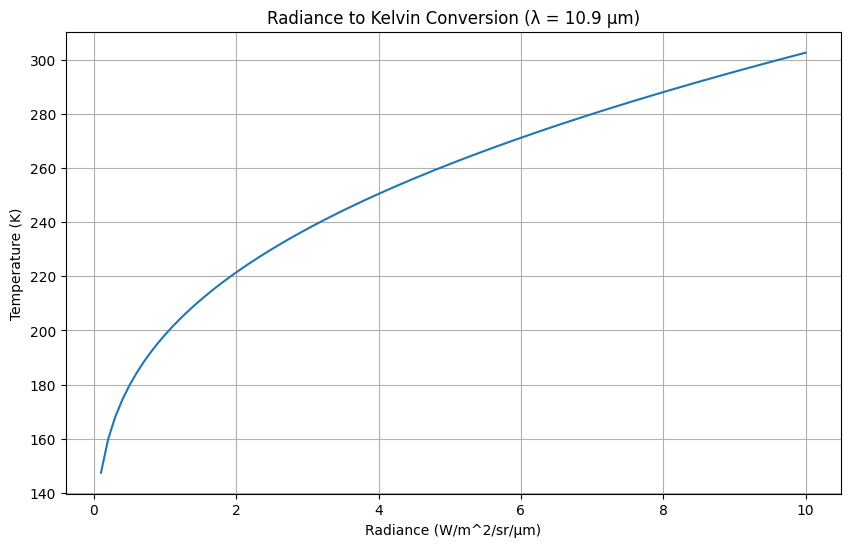

Example conversions:
Radiance: 0.50 W/m^2/sr/μm -> Temperature: 179.70 K
Radiance: 1.00 W/m^2/sr/μm -> Temperature: 198.40 K
Radiance: 10.00 W/m^2/sr/μm -> Temperature: 302.61 K
Radiance: 15.00 W/m^2/sr/μm -> Temperature: 333.09 K
Radiance: 250.00 W/m^2/sr/μm -> Temperature: 936.08 K


In [3]:
# Radiance to Kelvin Conversion

import numpy as np
import matplotlib.pyplot as plt

def radiance_to_kelvin(radiance, wavelength):
    """
    Convert radiance to temperature in Kelvin using Planck's function.
    
    Parameters:
    radiance (float or array): Radiance value(s) in W/m^2/sr/μm
    wavelength (float): Central wavelength in μm
    
    Returns:
    float or array: Temperature in Kelvin
    """
    c1 = 1.19104e8  # First radiation constant (W⋅μm^4/m^2/sr)
    c2 = 14387.7    # Second radiation constant (μm⋅K)
    
    temperature = c2 / (wavelength * np.log((c1 / (radiance * wavelength**5)) + 1))
    return temperature

# Example usage
wavelength = 10.9  # μm (example wavelength for thermal infrared)
radiance_values = np.linspace(0.1, 10, 100)  # Example radiance range

kelvin_values = radiance_to_kelvin(radiance_values, wavelength)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(radiance_values, kelvin_values)
plt.title(f'Radiance to Kelvin Conversion (λ = {wavelength} μm)')
plt.xlabel('Radiance (W/m^2/sr/μm)')
plt.ylabel('Temperature (K)')
plt.grid(True)
plt.show()

# Print some example conversions
print("Example conversions:")
for rad in [0.5, 1, 10, 15, 250]:
    temp = radiance_to_kelvin(rad, wavelength)
    print(f"Radiance: {rad:.2f} W/m^2/sr/μm -> Temperature: {temp:.2f} K")
